In [24]:
# Import dependencies for matplotlib
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [25]:
# Pandas Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
#Session(link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [32]:
# Query to retrieve the last 12 months of precipitation data and plot the results. 
one_year_back_date = dt.date(2017,8,23)- dt.timedelta(days=365)
print(f"One Year back date = {one_year_back_date}")

# Query to retrieve the date and precipitation scores
one_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=one_year_back_date).\
        filter(Measurement.date <= latest_date[0]).all()

One Year back date = 2016-08-23


In [33]:
# Saved the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(one_year_data, columns = ['Date', 'Precipitation'])
prcp_df = prcp_df.sort_values(by = 'Date')
prcp_df = prcp_df.dropna()
prcp_df

,Date,Precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


/Users/sravyamattapalli/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


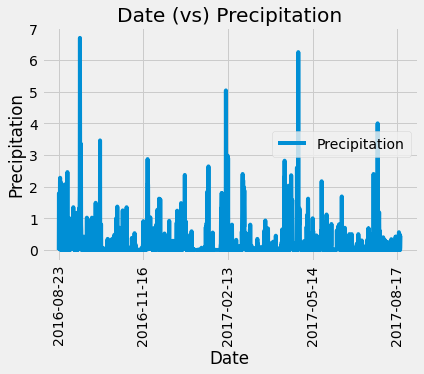

In [34]:
# Bar Chart
prcp_df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Date (vs) Precipitation")
plt.show()


In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = prcp_df.agg({"Precipitation":["min","max","mean","median"]})
value_count_prcp = prcp_df["Precipitation"].value_counts()
print(summary_stats)
print(f"Precipitation value counts :\n{value_count_prcp}")

        Precipitation
min          0.000000
max          6.700000
mean         0.177279
median       0.020000
Precipitation value counts :
0.00    874
0.02    113
0.01    100
0.03     77
0.06     58
       ... 
0.84      1
0.91      1
2.17      1
2.12      1
1.31      1
Name: Precipitation, Length: 160, dtype: int64


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [37]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_station = session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Most active station
most_active_station = active_station[0][0]
most_active_station

'USC00519281'

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(func.min(Measurement.tobs).label('Min Temperature'),func.max(Measurement.tobs).label('Max Temperature')\
                ,func.avg(Measurement.tobs).label('Average Temperature')).filter(Measurement.station == most_active_station ).all()

print(f'Min Temp for station USC00519281 is {temp_stats[0][0]}')
print(f'Max Temp for station USC00519281 is {temp_stats[0][1]}')
print(f'Avg Temp for station USC00519281 is {temp_stats[0][2]}')

Min Temp for station USC00519281 is 54.0
Max Temp for station USC00519281 is 85.0
Avg Temp for station USC00519281 is 71.66378066378067


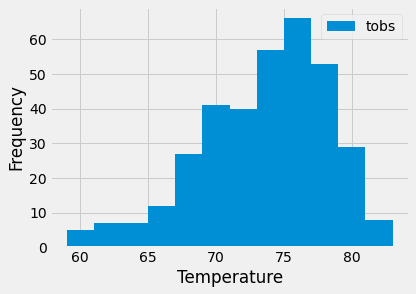

In [42]:
# # Using the most active station id
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.show()

In [41]:
# Close Session
session.close()